In [1]:
!pip install graspy

  Stored in directory: C:\Users\entity\AppData\Local\pip\Cache\wheels\34\6c\38\372202367bae328bae985520f57c0ecb53c5a53813b1af7560
Successfully built graspy


In [3]:
import graspy.models as gm
from graspy.simulations import sbm
from graspy.plot import heatmap
from graspy.utils import symmetrize

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
p = np.array([[0.9,0.11,0.13,0.2],
             [0,0.7,0.1,0.1],
             [0,0.11,0.8,0.1],
             [0,0,0,0.85]])

P = symmetrize(P)

csize = [50]*4
A_sim = sbm(csize,P)
heatmap(A_sim, title = '4-block SBM adjacency matrix')
G_sim = nx.from_numpy_matrix(np.array(A_sim))

dcsbme = gm.DCSBMEstimator(directed = False, loops = False, n_components = 4 ,max_comm = 4)
dcsbme.fit(G_sim)
draw_communites(dcsbme.vertex_assignments_, G_sim)
print("DCSBM \"B\" matrix ")

C:\Users\entity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


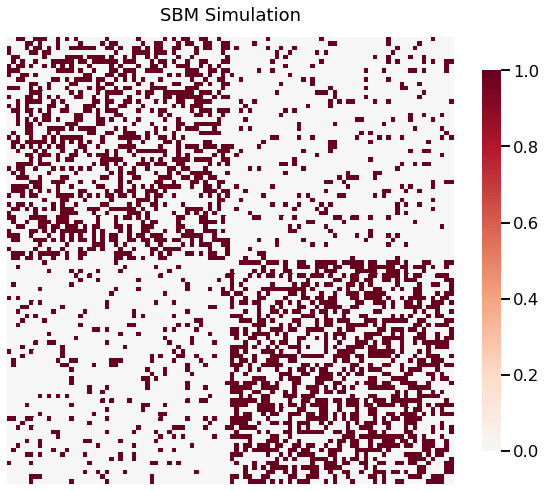

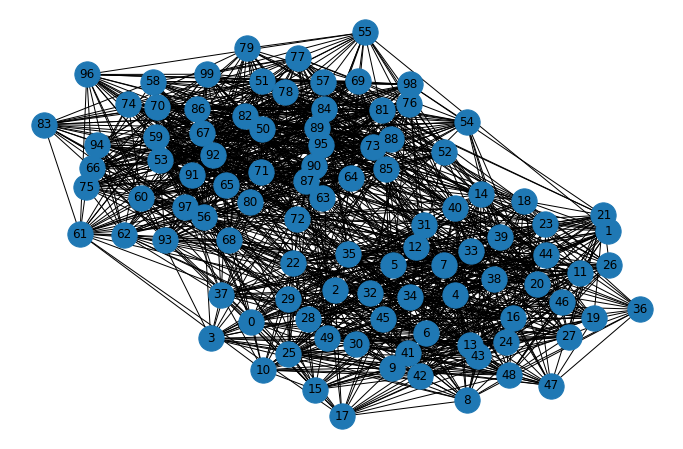

In [8]:
v = [50,50]
M = [[0.4, 0.1],
    [0.1, 0.5]]

A_sim = sbm(n = v, p = M)
heatmap(A_sim,title = 'SBM Simulation')
G_sim = nx.from_numpy_matrix(np.array(A_sim))
# pos = nx.kamada_kawai_layout(G_sim)
pos = nx.spring_layout(G_sim) 

plt.figure(figsize = (12,8))
nx.draw_networkx_edges(G_sim, pos = pos)
nx.draw_networkx_nodes(G_sim, pos = pos,node_size = 640)
nx.draw_networkx_labels(G_sim, pos = pos)
_ = plt.axis('off')

In [17]:
def get_idx(nums, cid):
    vertices = []
    
    for k,v in nums.items():
        if v == cid: vertices.append(k)
    return vertices

def draw_communities(vassmt,G):
    nx.kamada_kawai_layout(G)
    
    communities = []
    
    zi = dict(enumerate(vassmt))
    cnum = len(set(zi.values()))
    
    for c in range(cnum):
        communities.append(get_idx(zi, c))
    
    plt.figure(figsize = (12,8))
    nx.draw_networkx_edges(G,pos = pos)
    
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G,pos = pos, nodelist = community, node_color = color, node_size = 640)
    nx.draw_networkx_labels(G,pos = pos)
    _ = plt.axis("off")
    
colors = ['red','cyan','yellow','magenta','gree','blue','black']

C:\Users\entity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\entity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


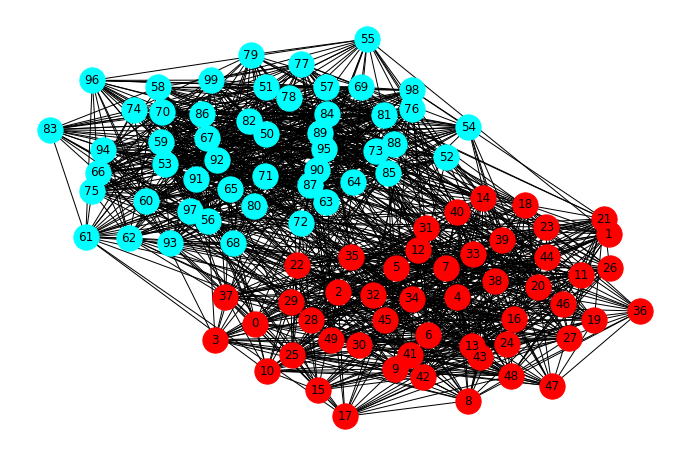

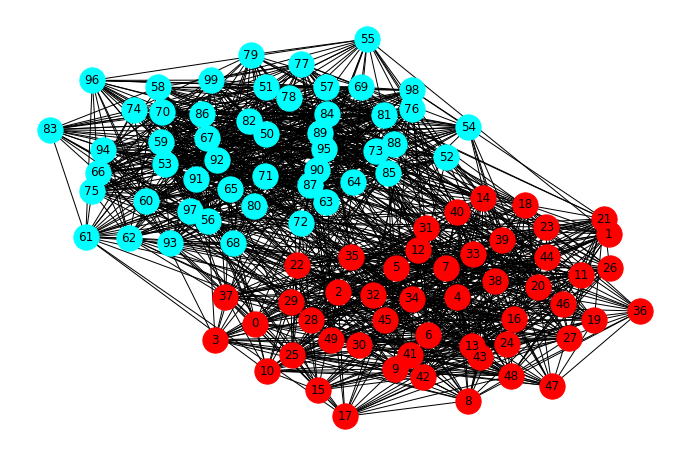

In [19]:
sbme = gm.SBMEstimator(directed = False, loops = False, n_components = 2, max_comm = 2)
sbme.fit(G_sim)
draw_communities(sbme.vertex_assignments_,G_sim)

dcsbme = gm.DCSBMEstimator(directed = False, loops = False, n_components = 2 ,max_comm = 2)
dcsbme.fit(G_sim)
draw_communities(dcsbme.vertex_assignments_,G_sim)